### Haydn's Branch Main Notebook

In [12]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

top200 = "datasets/Top200.csv"
topgenre = "datasets/Top10000genre.csv"

top200_df = pd.read_csv(top200)
topgenre_df = pd.read_csv(topgenre)

top200_df = top200_df.drop(columns=['Index','Song ID','Chord','Valence','Duration (ms)','Tempo','Liveness','Acousticness','Speechiness'])
topgenre_df = topgenre_df.drop(columns=['track_id','duration_ms','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','time_signature','valence'])
# genre = []
# genre = (pd.unique(topgenre_df['genre']))
# genre200 = []
# genre200 = (pd.unique(top200_df['Genre']))
# genre200

top200_df.columns
top200_df.Genre.value_counts()
# pop_genre = top200_df[top200_df['Genre'].str.contains('pop')]
# pop_genre = top200_df[(top200_df['Genre'].str.contains('pop')) & (top200_df['Genre'].str.len()<2)]
top200_df.Genre= top200_df.Genre.str.replace('[','')
top200_df.Genre= top200_df.Genre.str.replace(']','')
top200_df.Genre = top200_df.Genre.str.split(',')
top200_df = top200_df.explode('Genre')
top200_df.Genre = top200_df.Genre.str.replace("\'", "")

# top200_df.head()


# topgenre_df.info()


<ipython-input-12-bd9e0bf0844e>:24: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  top200_df.Genre= top200_df.Genre.str.replace('[','')
<ipython-input-12-bd9e0bf0844e>:25: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  top200_df.Genre= top200_df.Genre.str.replace(']','')


In [13]:
# #sorting music for specific genre
pop_genre = top200_df[top200_df.Genre=='pop']
hiphop_genre = top200_df[top200_df.Genre=='hip hop']
rap_genre = top200_df[top200_df.Genre=='rap']
pop_genre.shape[0]


100

In [14]:
#sorting music for word included (contains overlap)
pop_any = top200_df[top200_df.Genre.str.contains('pop')]
hiphop_any = top200_df[top200_df.Genre.str.contains('hip hop')]
rap_any = top200_df[top200_df.Genre.str.contains('rap')]
rb_any = top200_df[top200_df.Genre.str.contains('r&b')]
country_any = top200_df[top200_df.Genre.str.contains('country')]
rock_any = top200_df[top200_df.Genre.str.contains('rock')]
alt_any = top200_df[top200_df.Genre.str.contains('alternative')]
dance_any = top200_df[top200_df.Genre.str.contains('dance')]
edm_any = top200_df[top200_df.Genre.str.contains('edm')]
# house_any = top200_df[top200_df.Genre.str.contains('house')]
# come back and group rest of unique categories
jazz_any = top200_df[top200_df.Genre.str.contains('jazz')]
indie_any = top200_df[top200_df.Genre.str.contains('indie')]
itl_any = top200_df[top200_df.Genre.str.contains('italiano')]
span_any = top200_df[top200_df.Genre.str.contains('reggaeton')]
trap_any = top200_df[top200_df.Genre.str.contains('trap')]
latin_any = top200_df[top200_df.Genre.str.contains('latin')]
trap_any = top200_df[top200_df.Genre.str.contains('trap')]

In [15]:
#setting other category 
genre_list = ['pop','hip hop','rap','r&b','country','rock','alternative','dance','edm','jazz','indie','italiano','reggaeton','trap','latin']
pattern = '|'.join(genre_list)
result = top200_df.loc[~(top200_df['Genre'].str.contains(pattern, case=False))]
other = result
other_genre = (pd.unique(result['Genre']))
other.Genre.value_counts()

                    75
 tropical house     44
brooklyn drill      37
alt z               20
adult standards     18
                    ..
musical advocacy     1
jawaiian             1
chicago drill        1
 new romantic        1
 sertanejo           1
Name: Genre, Length: 136, dtype: int64

In [31]:
genre = (pd.unique(top200_df['Genre']))
# genre

In [65]:
# artist appearances on charts group by artist
grouped_artists = top200_df.groupby(['Artist'])


artist_counts = top200_df.Artist.value_counts()

top_20_artists = artist_counts.head(20)
artist_names = top_20_artists.unique()

In [68]:
artist_comparison = grouped_artists['Number of Times Charted'].sum()
artist_comparison
# top_artists = artist_comparison.sort_values(['Number of Times Charted'],ascending=False)
# top_artists

Artist
*NSYNC                                                                    4
13 Organisé, SCH, Kofs, Jul, Naps, Soso Maness, Elams, Solda, Houari     36
187 Strassenbande, Bonez MC, Frauenarzt                                   2
21 Savage, Metro Boomin                                                 100
24kGoldn                                                                 72
                                                                       ... 
iann dior                                                                 4
jxdn                                                                      1
salem ilese                                                              42
sangiovanni                                                               8
twocolors                                                                 8
Name: Number of Times Charted, Length: 716, dtype: int64

<BarContainer object of 20 artists>

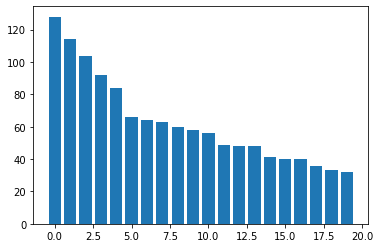

In [64]:
x_axis = np.arange(len(top_20_artists))
plt.bar(x_axis,top_20_artists,alpha=1,align="center")
# plt.xticks(artist_names)